
In this project, i go through a prediction of airline ticket prices.
start by;


### understanding data

we aim to predict price of the airline ticket
>
--*importing modules--
--*loading data--
--*look out for missing data--
--*check the data types of the data--
--*preprocessing data--
--*fetching categrical data--
~
>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
data_train = pd.read_excel("C:/Users/hp/Downloads/Data_Train.xlsx")

In [13]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [15]:
#drop missing values because they are very few

data_train.dropna(inplace=True)

In [16]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [17]:
#check the datatypes

data_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [18]:
#change to datetime object

def change_todt(col):
    data_train[col] = pd.to_datetime(data_train[col])

In [19]:
#all our columns

data_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [20]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
          change_todt(i)
          
           

In [21]:
data_train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [22]:
#split the date into day, month and year 

data_train['jou_day']=data_train["Date_of_Journey"].dt.day
data_train['jou_month']=data_train["Date_of_Journey"].dt.month
data_train['jou_year']=data_train["Date_of_Journey"].dt.year

In [23]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jou_day,jou_month,jou_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-21 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-21 05:50:00,2021-06-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-21 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-21 18:05:00,2021-06-21 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-21 16:50:00,2021-06-21 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [24]:
data_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'jou_day', 'jou_month', 'jou_year'],
      dtype='object')

In [25]:
data_train.drop('Date_of_Journey',axis=1, inplace=True)

In [26]:
data_train

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jou_day,jou_month,jou_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-06-21 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-21 05:50:00,2021-06-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-21 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-06-21 18:05:00,2021-06-21 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-06-21 16:50:00,2021-06-21 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2021-06-21 19:55:00,2021-06-21 22:25:00,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,2021-06-21 20:45:00,2021-06-21 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2021-06-21 08:20:00,2021-06-21 11:20:00,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,2021-06-21 11:30:00,2021-06-21 14:10:00,2h 40m,non-stop,No info,12648,3,1,2019


In [27]:
#

def extract_hour(df,col):
    df[col + ' hour'] = df[col].dt.hour
    
def extract_minutes(df,col):
    df[col + ' minutes'] = df[col].dt.minute
    
def drop_col(df, col):
    df.drop(col,axis=1,inplace=True)

In [28]:
extract_hour(data_train,'Dep_Time')
extract_minutes(data_train,'Dep_Time')
drop_col(data_train,'Dep_Time')


In [29]:
extract_hour(data_train,'Arrival_Time')
extract_minutes(data_train,'Arrival_Time')
drop_col(data_train,'Arrival_Time')

In [30]:
data_train.tail()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,jou_day,jou_month,jou_year,Dep_Time hour,Dep_Time minutes,Arrival_Time hour,Arrival_Time minutes
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2 stops,No info,11753,5,9,2019,10,55,19,15


In [31]:
len(data_train)

10682

In [32]:
#converting duration into hour and minutes
#start by extracting it as a list

duration = list(data_train['Duration'])

In [33]:
#create a function that adds 0h or 0m appropriately

for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
    
     

In [34]:
data_train['Duration'] =duration

In [35]:
data_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,jou_day,jou_month,jou_year,Dep_Time hour,Dep_Time minutes,Arrival_Time hour,Arrival_Time minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10


In [36]:
#extract minutes and hours 

def hour(x):
    return x.split(" ")[0][0:-1]

def mint(x):
    return x.split(" ")[1][0:-1]

In [37]:
#applying a function to a column

data_train['duration_hour'] = data_train['Duration'].apply(hour)
data_train['duration_minutes'] =data_train['Duration'].apply(mint)

In [38]:
drop_col(data_train,'Duration')

In [39]:
data_train.dtypes

Airline                 object
Source                  object
Destination             object
Route                   object
Total_Stops             object
Additional_Info         object
Price                    int64
jou_day                  int64
jou_month                int64
jou_year                 int64
Dep_Time hour            int64
Dep_Time minutes         int64
Arrival_Time hour        int64
Arrival_Time minutes     int64
duration_hour           object
duration_minutes        object
dtype: object

In [40]:
#convert the types of the data

data_train['duration_hour'] = data_train['duration_hour'].astype(int)
data_train['duration_minutes'] = data_train['duration_minutes'].astype(int)

In [41]:
data_train.dtypes

Airline                 object
Source                  object
Destination             object
Route                   object
Total_Stops             object
Additional_Info         object
Price                    int64
jou_day                  int64
jou_month                int64
jou_year                 int64
Dep_Time hour            int64
Dep_Time minutes         int64
Arrival_Time hour        int64
Arrival_Time minutes     int64
duration_hour            int32
duration_minutes         int32
dtype: object

In [42]:
#categorical data
# we need to convert this to numerical data

cat_col = [col for col in data_train.columns if data_train[col].dtype == 'object']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

# feature encoding 
>#nominal data- no hierachy- one hot encoding
>#ordinary data- have some kind of hierchchy- label encoding



In [43]:
categorical = data_train[cat_col]

In [44]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [45]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

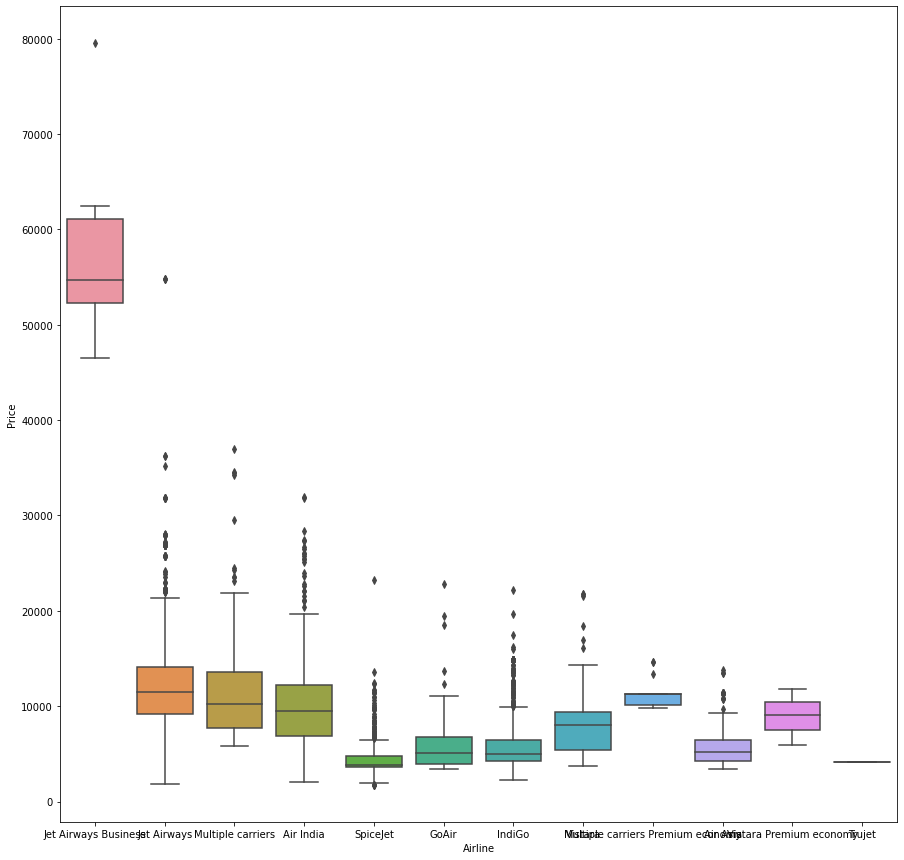

In [46]:
#
plt.figure(figsize=(15,15))
sns.boxplot(x='Airline',y='Price',data=data_train.sort_values('Price', ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

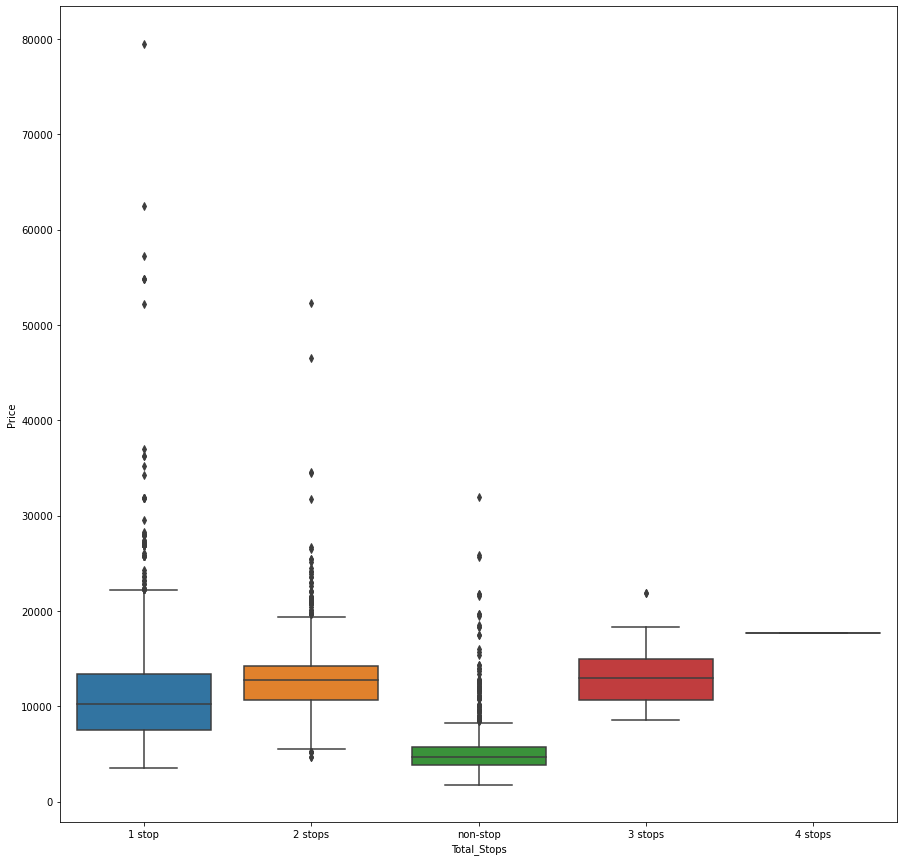

In [47]:
#
plt.figure(figsize=(15,15))
sns.boxplot(x='Total_Stops',y='Price',data=data_train.sort_values('Price', ascending=False))

In [48]:
#one hot encoding

Airline = pd.get_dummies(categorical['Airline'],drop_first=True)

In [49]:
Airline.isnull().sum()

Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
dtype: int64

In [50]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

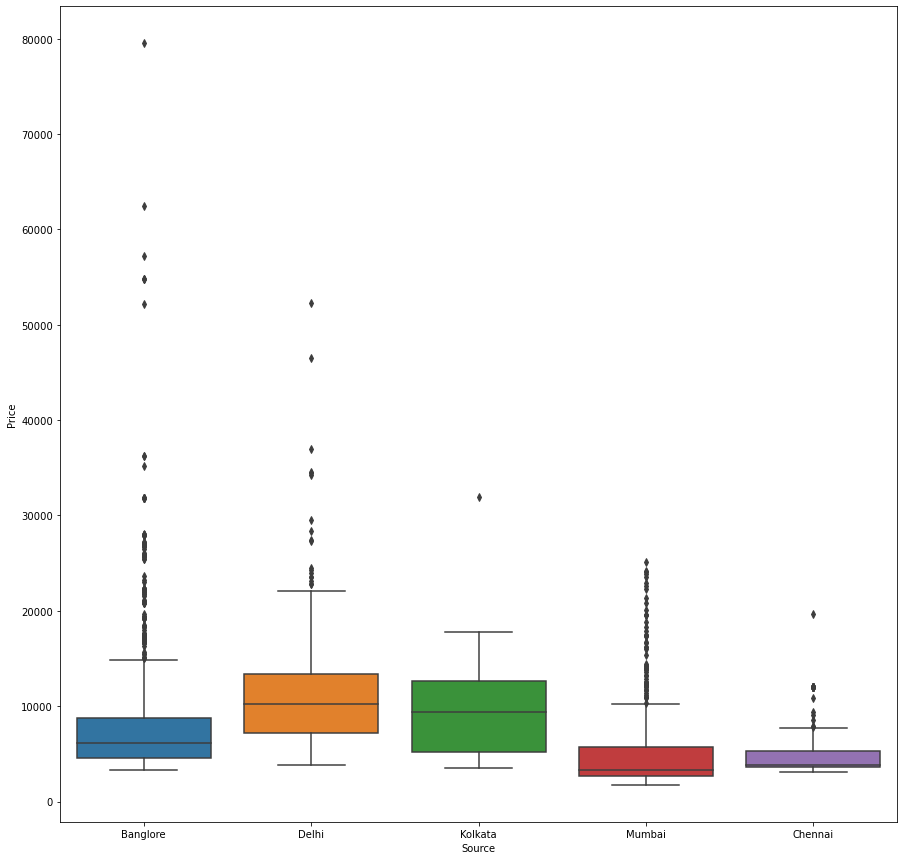

In [51]:
#
plt.figure(figsize=(15,15))
sns.boxplot(x='Source',y='Price',data=data_train.sort_values('Price', ascending=False))

In [52]:
Source = pd.get_dummies(categorical['Source'],drop_first=True)

In [53]:
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


<AxesSubplot:xlabel='Destination', ylabel='Price'>

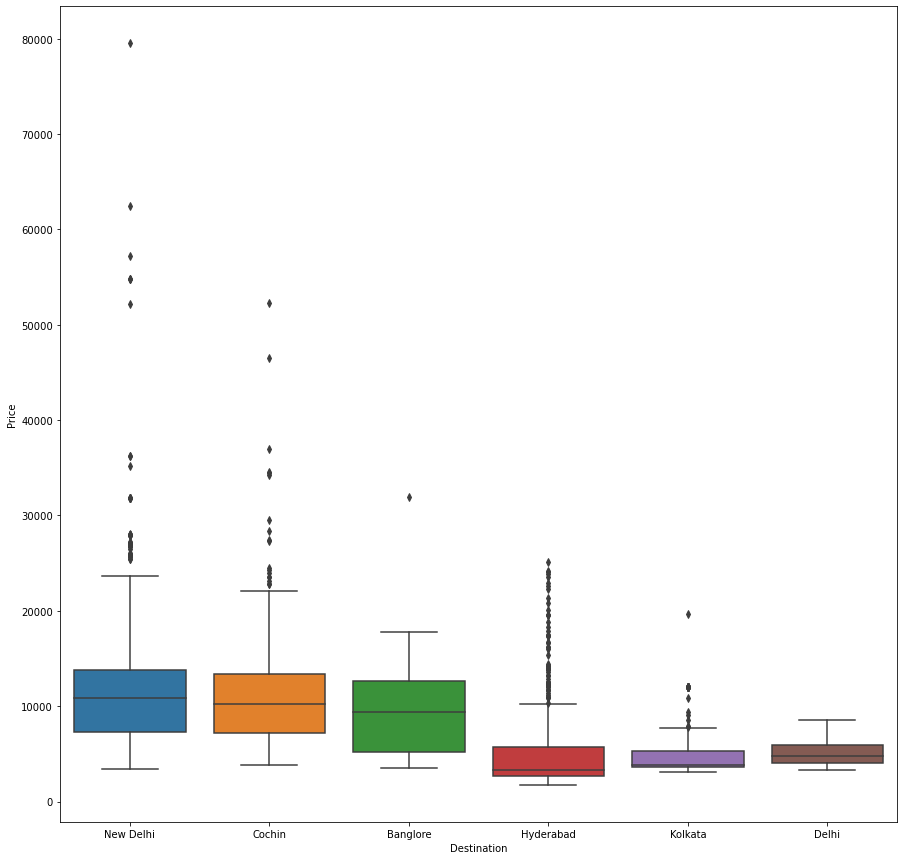

In [54]:
#
plt.figure(figsize=(15,15))
sns.boxplot(x='Destination',y='Price',data=data_train.sort_values('Price', ascending=False))

In [55]:
Destination = pd.get_dummies(categorical['Destination'],drop_first=True)

In [56]:
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [57]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [58]:
#

categorical['route_one'] = categorical['Route'].str.split('→').str[0]
categorical['route_two'] = categorical['Route'].str.split('→').str[1]
categorical['route_three'] = categorical['Route'].str.split('→').str[2]
categorical['route_four'] = categorical['Route'].str.split('→').str[3]
categorical['route_five'] = categorical['Route'].str.split('→').str[4]

<ipython-input-58-8d3bf6872942>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['route_one'] = categorical['Route'].str.split('→').str[0]
<ipython-input-58-8d3bf6872942>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['route_two'] = categorical['Route'].str.split('→').str[1]
<ipython-input-58-8d3bf6872942>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [59]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,route_one,route_two,route_three,route_four,route_five
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [60]:
drop_col(categorical,'Route')

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,route_one,route_two,route_three,route_four,route_five
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [62]:
#check for missing values
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
route_one              0
route_two              0
route_three         3491
route_four          9116
route_five         10636
dtype: int64

In [63]:
#impute missing value

for i in ['route_three','route_four','route_five']:
    categorical[i].fillna('None', inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [64]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
route_one          0
route_two          0
route_three        0
route_four         0
route_five         0
dtype: int64

In [65]:
#categories in every feature

for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
route_one has total 5 categories
route_two has total 45 categories
route_three has total 30 categories
route_four has total 14 categories
route_five has total 6 categories


In [66]:
#get rid high dimensionality issue

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [67]:
for i in ['route_one','route_two','route_three','route_four','route_five']:
    categorical[i] = encoder.fit_transform(categorical[i])

<ipython-input-67-67b28a836f8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = encoder.fit_transform(categorical[i])


In [68]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,route_one,route_two,route_three,route_four,route_five
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [69]:
drop_col(categorical,'Additional_Info')

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [70]:
categorical.head()

,Airline,Source,Destination,Total_Stops,route_one,route_two,route_three,route_four,route_five
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [71]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [72]:
dict = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}

In [73]:
dict

{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

In [74]:
categorical['Total_Stops'] = data_train['Total_Stops']

<ipython-input-74-0899037465d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] = data_train['Total_Stops']


In [75]:
categorical['Total_Stops']= categorical['Total_Stops'].map(dict)

<ipython-input-75-d03dc0afd4f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']= categorical['Total_Stops'].map(dict)


In [76]:
categorical.head()

,Airline,Source,Destination,Total_Stops,route_one,route_two,route_three,route_four,route_five
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [77]:

import warnings; warnings.simplefilter('ignore')


In [78]:
#concat all the dataframe we have defined

train_data = pd.concat([categorical,Airline,Source, Destination,data_train[cat_col]], axis=1)

In [79]:
train_data.head()

,Airline,Source,Destination,Total_Stops,route_one,route_two,route_three,route_four,route_five,Air India,...,Delhi,Hyderabad,Kolkata,New Delhi,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,0,0,0,1,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,0,0,0,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,0,0,0,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,0,0,0,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,0,0,0,1,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [80]:
data_train.dtypes

Airline                 object
Source                  object
Destination             object
Route                   object
Total_Stops             object
Additional_Info         object
Price                    int64
jou_day                  int64
jou_month                int64
jou_year                 int64
Dep_Time hour            int64
Dep_Time minutes         int64
Arrival_Time hour        int64
Arrival_Time minutes     int64
duration_hour            int32
duration_minutes         int32
dtype: object

In [81]:
#continous data

cont_col = [col for col in data_train.columns if data_train[col].dtypes != 'object' ]

In [82]:
cont_col

['Price',
 'jou_day',
 'jou_month',
 'jou_year',
 'Dep_Time hour',
 'Dep_Time minutes',
 'Arrival_Time hour',
 'Arrival_Time minutes',
 'duration_hour',
 'duration_minutes']

In [83]:
#concat all the dataframe we have defined

train_data = pd.concat([categorical,Airline,Source, Destination,data_train[cont_col]], axis=1)

In [84]:
train_data

,Airline,Source,Destination,Total_Stops,route_one,route_two,route_three,route_four,route_five,Air India,...,Price,jou_day,jou_month,jou_year,Dep_Time hour,Dep_Time minutes,Arrival_Time hour,Arrival_Time minutes,duration_hour,duration_minutes
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,13302,3,1,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,2,5,29,13,5,0,...,4107,4,9,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,2,5,29,13,5,1,...,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,0,13,29,13,5,0,...,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,0,13,29,13,5,0,...,12648,3,1,2019,11,30,14,10,2,40


In [85]:
drop_col(train_data,'Airline')

In [86]:
drop_col(train_data,'Source')
drop_col(train_data,'Destination')

In [87]:
train_data.head()

,Total_Stops,route_one,route_two,route_three,route_four,route_five,Air India,GoAir,IndiGo,Jet Airways,...,Price,jou_day,jou_month,jou_year,Dep_Time hour,Dep_Time minutes,Arrival_Time hour,Arrival_Time minutes,duration_hour,duration_minutes
0,0,0,13,29,13,5,0,0,1,0,...,3897,24,3,2019,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,7662,5,1,2019,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,13882,6,9,2019,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,6218,5,12,2019,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,13302,3,1,2019,16,50,21,35,4,45


In [88]:
# 

pd.set_option('display.max_columns',35)
train_data.head()

,Total_Stops,route_one,route_two,route_three,route_four,route_five,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,jou_day,jou_month,jou_year,Dep_Time hour,Dep_Time minutes,Arrival_Time hour,Arrival_Time minutes,duration_hour,duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3897,24,3,2019,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,7662,5,1,2019,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,13882,6,9,2019,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6218,5,12,2019,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,13302,3,1,2019,16,50,21,35,4,45


In [89]:
'Price' in train_data.columns

True

# outlier detection

In [90]:
#outlier detection 
#outlier imputation
#box approach and

def plot(df,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    

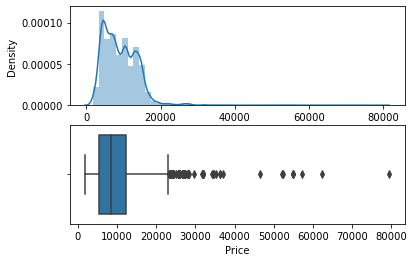

In [91]:
plot(train_data,'Price')

In [92]:
#with outlier, median comes in handy

train_data['Price'] = np.where(train_data['Price']>=40000, train_data['Price'].median(),train_data['Price'])

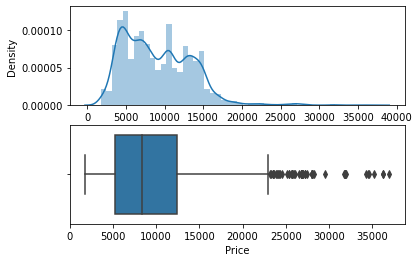

In [93]:
plot(train_data,'Price')

In [94]:
#separete independent features from dependent features

In [95]:
X = train_data.drop('Price', axis=1)

In [96]:
y=train_data['Price']

In [97]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

# feature selection

In [98]:
#this is important to reduce dimensions

from sklearn.feature_selection import mutual_info_classif



In [99]:
mutual_info_classif(X,y)

array([2.16124779, 2.05910939, 2.78116923, 2.27617899, 1.45958517,
       0.75689224, 0.76267923, 0.09714515, 0.68247479, 0.92150473,
       0.        , 0.58054143, 0.0273576 , 0.31972703, 0.        ,
       0.21609188, 0.        , 0.17780638, 1.56833339, 0.87286958,
       0.29956783, 1.52333003, 0.41036433, 0.30365366, 0.17328742,
       0.36885704, 1.07524669, 0.87104218, 1.43109771, 1.43149668,
       1.2330785 , 1.85271814, 1.53839005, 1.7858133 , 1.0670312 ])

In [100]:
#
impt = pd.DataFrame(mutual_info_classif(X,y), index = X.columns)

In [101]:
impt

,0
Total_Stops,2.148857
route_one,2.054186
route_two,2.726996
route_three,2.279731
route_four,1.494037
route_five,0.739405
Air India,0.765939
GoAir,0.103551
IndiGo,0.669042
Jet Airways,0.933806


In [102]:
#arrange the features according to importance

impt.columns = ['importance']
impt.sort_values(by='importance',ascending=False)

,importance
route_two,2.726996
route_three,2.279731
Total_Stops,2.148857
route_one,2.054186
Arrival_Time hour,1.832143
duration_hour,1.774022
Delhi,1.565146
Cochin,1.535579
Arrival_Time minutes,1.516059
route_four,1.494037


# apply ml and automate prediction

In [103]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [105]:
#automating our prediction

def predict(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('training score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_test)
    print('predictions are:\b {}'.format(y_pred))
    print('\n')
    
    r2_score = metrics.r2_score(y_test, y_pred)
    print('r2 score is:  {}'.format(r2_score))
    
    print('MSE :', metrics.mean_squared_error(y_test,y_pred))
    print('MAE :', metrics.mean_absolute_error(y_test,y_pred))
    print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    
    sns.distplot(y_test-y_pred)
    
   

In [106]:
from sklearn.ensemble import RandomForestRegressor

training score : 0.9532330591083561
predictions are: [14405.13        4088.96        6583.67083333 ...  6710.85
  4904.25       12672.07869048]


r2 score is:  0.8188241648606751
MSE : 3271201.7583914325
MAE : 1129.4493479721677
RMSE : 1808.6463884329166


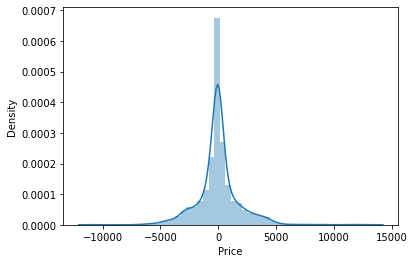

In [107]:
predict(RandomForestRegressor())

# dumping our model

--open a file
--model name
--import pickle module
--store in a variable
--pickle.dump(model)
--add a condition 

In [108]:
from sklearn import metrics
import pickle

def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('training score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_test)
    print('predictions are:\b {}'.format(y_pred))
    print('\n')
    
    r2_score = metrics.r2_score(y_test, y_pred)
    print('r2 score is:  {}'.format(r2_score))
    
    print('MSE :', metrics.mean_squared_error(y_test,y_pred))
    print('MAE :', metrics.mean_absolute_error(y_test,y_pred))
    print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    
    sns.distplot(y_test-y_pred)
    
    if dump == 1:
        file = open("D:/MyLib.Doc/flight/flightmodel",'wb')
        pickle.dump(model, file)
    
    
   

training score : 0.9535723831500018
predictions are: [14574.6         4115.48        6550.9045     ...  6737.17
  4899.         12618.11416667]


r2 score is:  0.8173044890340382
MSE : 3298640.109827521
MAE : 1130.2027287731246
RMSE : 1816.2158764385695


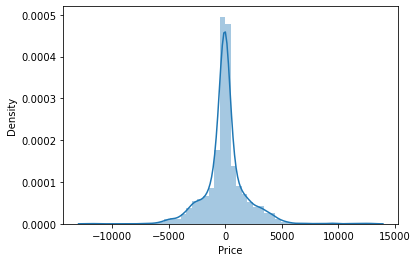

In [109]:
predict(RandomForestRegressor(),1)

In [110]:
#

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier


training score : 0.6186691314891613
predictions are: [13591.53714075  3339.75995104  7521.18055816 ...  7485.84943778
  5626.7243641  14184.59187839]


r2 score is:  0.602706267686143
MSE : 7173296.343541427
MAE : 1929.3244532095798
RMSE : 2678.3010180973733


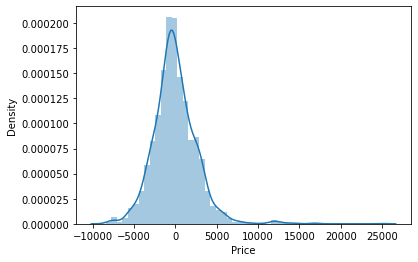

In [111]:
#we are using linear regression
# we pass 0 because we have not dumped

predict(LinearRegression(),0)

training score : 0.784715140845405
predictions are [12804.6  4027.2  7386.4 ...  6200.6  6579.  12151.4]


r2 score is:  0.6162790635344825
MSE : 6928234.116499766
MAE : 1732.4331305568555
RMSE : 2632.1538930122924


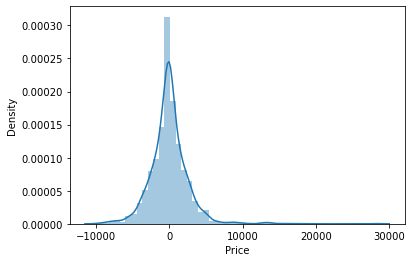

In [112]:
predict(KNeighborsRegressor(),0)

training score : 0.8803978935049737
predictions are: [15129.  4591.  5198. ...  6426.  4878. 12819.]


r2 score is:  0.646395364855782
MSE : 6384472.318671034
MAE : 1407.3724847917642
RMSE : 2526.751336928712


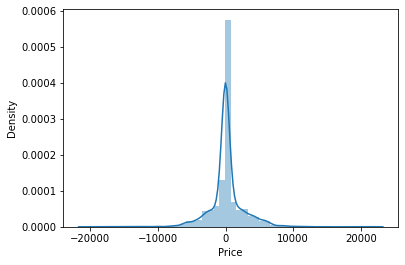

In [113]:
predict(DecisionTreeClassifier(),0)

In [114]:
from sklearn.tree import DecisionTreeRegressor

training score : 0.9666365249758673
predictions are: [14429.  3419.  7229. ...  7173.  4878. 12819.]


r2 score is:  0.7393037225262551
MSE : 4706974.97059923
MAE : 1246.5433473717046
RMSE : 2169.5563994971944


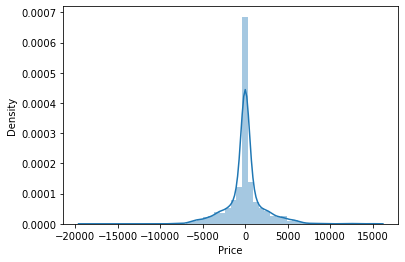

In [115]:
predict(DecisionTreeRegressor(),0)

# hypertuning

In [116]:
#randomized search cv
#grid search cv

In [126]:
#importing modules

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [127]:
#creatcreating values for the features

n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=4)]

In [154]:
#create the dictionary

random_grid={'n_estimators':n_estimators,
            'max_features':['auto','sqrt'],
            'max_depth':max_depth,
            'min_samples_split':[5,10,15,100]}

In [155]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [156]:
reg = RandomForestRegressor()

In [157]:
rf_random =RandomizedSearchCV(estimator=reg, 
                            param_distributions= random_grid,
                           cv=3,verbose=2,n_jobs=-1
                           )

In [158]:
rf_random

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [159]:
reg.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [160]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [161]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 30}

In [163]:
pred = rf_random.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

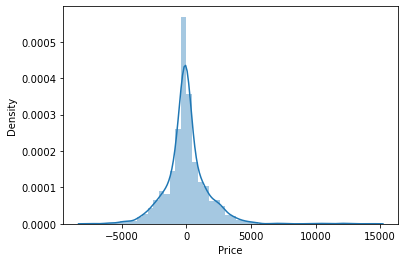

In [164]:
sns.distplot(y_test-pred)

In [166]:
#

metrics.r2_score(y_test, pred)

0.84703670178341

In [170]:
#dumping the model

file2 = open('D:/MyLib.Doc/flight/bestmodel.pkl','wb')

In [171]:
pickle.dump(rf_random,file2)

In [176]:
#

readingmodel = open('D:/MyLib.Doc/flight/bestmodel.pkl','rb')

In [177]:
rf = pickle.load(readingmodel)

In [179]:
predictions = rf.predict(X_test)

In [181]:
#the results after hypertuning

metrics.r2_score(y_test,predictions)

0.84703670178341

In [183]:
readingmodel2 = open("D:/MyLib.Doc/flight/flightmodel",'rb')

In [184]:
rf2 = pickle.load(readingmodel2)

In [185]:
predictions2 = rf2.predict(X_test)

In [186]:
#this is the accuracy level before hypertuning
metrics.r2_score(y_test,predictions2)

0.8173044890340382